# 0. EDA Process

**1. 1차원데이터분석**

**1.** **변수종류파악( 수치형/ 범주형/ 시간형)**

**2.** **변수종류별분석지표( 수치형/ 범주형/ 시간형)**

**3.** **시각화**

- **도수분포표/ 히스토그램/ 상자그림**

**2. 2차원데이터분석**

**1.** **공분산/ 상관계수**

**2.** **다중공선성확인**

**3.** **시각화**

- **산점도/ 회귀직선/ 히트맵**

# 항공사 지연 요인 분석

## 데이터 설명
1. airline : 항공사
2. carrier_delay : 항공사 지연 비율
3. atc_delay : 항공교통관제 지연 비율
4. weather_delay : 날씨로 인한 지연 비율

## 범주형, 수치형
1 .범주형 : airline  
2. 수치형 : carrier_delay, atc_delay, weather_delay

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [58]:
!cd

C:\Users\jisu\Desktop\hellopython


In [60]:
df = pd.read_csv('./airline_stats.csv')
df

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American
...,...,...,...,...
33463,6.186422,8.798491,1.651940,Southwest
33464,9.522167,3.591133,0.261084,Southwest
33465,9.164179,2.664179,0.343284,Southwest
33466,5.152293,1.964520,0.122817,Southwest


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33468 entries, 0 to 33467
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pct_carrier_delay  33440 non-null  float64
 1   pct_atc_delay      33440 non-null  float64
 2   pct_weather_delay  33440 non-null  float64
 3   airline            33468 non-null  object 
dtypes: float64(3), object(1)
memory usage: 1.0+ MB


## airline(항공사)는 총 6개

In [109]:
df['airline'].unique()

array(['American', 'Alaska', 'Jet Blue', 'Delta', 'United', 'Southwest'],
      dtype=object)

In [103]:
df['airline'].value_counts()

airline
Delta        9107
American     5725
Southwest    5584
United       5426
Alaska       3851
Jet Blue     3775
Name: count, dtype: int64

## 수치형 변수의 통계량 확인

In [116]:
df.describe()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay
count,33440.000000,33440.000000,33440.000000
mean,7.041475,5.089962,0.684776
std,4.497596,4.718647,1.073743
min,0.000000,0.000000,0.000000
25%,4.145455,2.146565,0.000000
50%,6.356893,3.900000,0.316002
75%,9.140474,6.630238,0.935161
max,100.000000,100.000000,33.333333


## 항공사별 기술 통계량

### 항공사 요인의 경우, American이 평균 9.04%, Jet Blue 평균 8.08% 순임
### 표준편차가 가장 큰 항공사는 United로 5.36

In [136]:
df.groupby('airline').describe().T

airline                       Alaska     American        Delta     Jet Blue  \
pct_carrier_delay count  3851.000000  5723.000000  9095.000000  3773.000000   
                  mean      3.521889     9.042180     6.333460     8.081843   
                  std       2.483224     4.139067     4.695292     3.797737   
                  min       0.000000     0.000000     0.000000     0.000000   
                  25%       1.935484     6.338538     3.813989     5.341176   
                  50%       3.225806     8.428571     5.548387     7.657895   
                  75%       4.685599    10.988763     7.821952    10.280000   
                  max      22.290323    50.000000   100.000000    28.000000   
pct_atc_delay     count  3851.000000  5723.000000  9095.000000  3773.000000   
                  mean      5.472672     5.993529     4.462978     7.345231   
                  std       5.699303     4.647170     4.364335     5.227372   
                  min       0.000000     0.000000     0.000000     0.000000   
                  25%       1.878614     3.108403     1.818182     3.784314   
                  50%       3.776860     4.986523     3.508108     6.136905   
                  75%       7.001330     7.594450     5.839901     9.612903   
                  max      54.838710    60.000000   100.000000    40.986111   
pct_weather_delay count  3851.000000  5723.000000  9095.000000  3773.000000   
                  mean      0.513497     1.122920     0.680765     0.465327   
                  std       1.136494     1.097811     1.093255     0.764147   
                  min       0.000000     0.000000     0.000000     0.000000   
                  25%       0.000000     0.296719     0.000000     0.000000   
                  50%       0.000000     0.884354     0.316406     0.157312   
                  75%       0.497395     1.641725     0.893346     0.666667   
                  max      14.633803    12.500000    20.500000     9.923077   

airline                    Southwest       United  
pct_carrier_delay count  5584.000000  5414.000000  
                  mean      7.521997     7.398833  
                  std       3.345085     5.369283  
                  min       0.000000     0.000000  
                  25%       5.070294     4.034708  
                  50%       6.960930     6.445210  
                  75%       9.354839     9.633110  
                  max      24.800000   100.000000  
pct_atc_delay     count  5584.000000  5414.000000  
                  mean      3.147019     5.348133  
                  std       2.513162     4.992464  
                  min       0.000000     0.000000  
                  25%       1.612527     2.431308  
                  50%       2.559242     4.353647  
                  75%       3.790421     7.030109  
                  max      21.542722   100.000000  
pct_weather_delay count  5584.000000  5414.000000  
                  mean      0.512611     0.680697  
                  std       0.649631     1.338433  
                  min       0.000000     0.000000  
                  25%       0.105675     0.000000  
                  50%       0.305598     0.263780  
                  75%       0.663306     0.861395  
                  max       6.240987    33.333333

In [126]:
for i in df['airline'].unique():
    print(i)
    print(df[df['airline']==i].describe())

American
       pct_carrier_delay  pct_atc_delay  pct_weather_delay
count        5723.000000    5723.000000        5723.000000
mean            9.042180       5.993529           1.122920
std             4.139067       4.647170           1.097811
min             0.000000       0.000000           0.000000
25%             6.338538       3.108403           0.296719
50%             8.428571       4.986523           0.884354
75%            10.988763       7.594450           1.641725
max            50.000000      60.000000          12.500000
Alaska
       pct_carrier_delay  pct_atc_delay  pct_weather_delay
count        3851.000000    3851.000000        3851.000000
mean            3.521889       5.472672           0.513497
std             2.483224       5.699303           1.136494
min             0.000000       0.000000           0.000000
25%             1.935484       1.878614           0.000000
50%             3.225806       3.776860           0.000000
75%             4.685599       7.001330 

## 결측치 확인
### 각 변수별로 28건의 결측치

In [119]:
df.isna().sum()

pct_carrier_delay    28
pct_atc_delay        28
pct_weather_delay    28
airline               0
dtype: int64

In [171]:
df[df['pct_carrier_delay'].isnull()].index

Index([ 4809,  6123,  7069,  9241, 12081, 12541, 13058, 13534, 13547, 13996,
       14477, 14854, 17488, 21214, 23113, 23605, 23688, 23689, 26377, 27127,
       27615, 27714, 29089, 29225, 32232, 32233, 33275, 33297],
      dtype='int64')

In [173]:
df[df['pct_atc_delay'].isnull()].index

Index([ 4809,  6123,  7069,  9241, 12081, 12541, 13058, 13534, 13547, 13996,
       14477, 14854, 17488, 21214, 23113, 23605, 23688, 23689, 26377, 27127,
       27615, 27714, 29089, 29225, 32232, 32233, 33275, 33297],
      dtype='int64')

In [175]:
df[df['pct_weather_delay'].isnull()].index

Index([ 4809,  6123,  7069,  9241, 12081, 12541, 13058, 13534, 13547, 13996,
       14477, 14854, 17488, 21214, 23113, 23605, 23688, 23689, 26377, 27127,
       27615, 27714, 29089, 29225, 32232, 32233, 33275, 33297],
      dtype='int64')

## 시각화

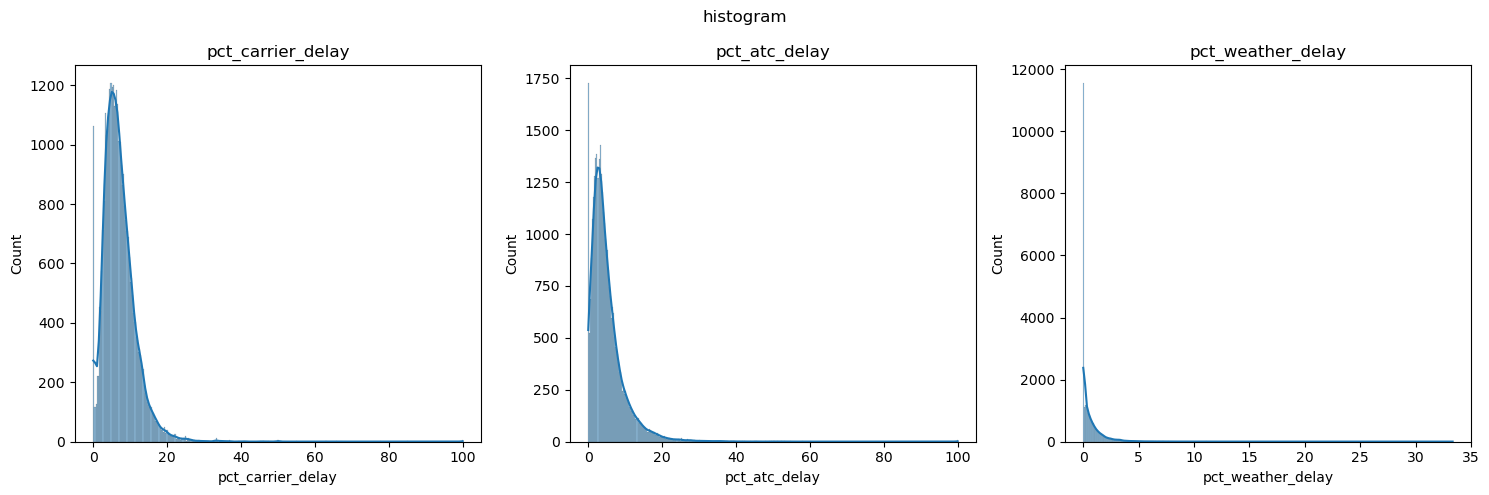

In [151]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(data=df, x='pct_carrier_delay', kde=True, ax=axes[0])
sns.histplot(data=df, x=df['pct_atc_delay'], kde=True, ax=axes[1])
sns.histplot(data=df, x=df['pct_weather_delay'], kde=True, ax=axes[2])

axes[0].set_title('pct_carrier_delay')
axes[1].set_title('pct_atc_delay')
axes[2].set_title('pct_weather_delay')

fig.suptitle('histogram')

plt.tight_layout()
plt.show()

## 이상치
### 항공사 지연은 20% 이상인 경우를 이상치로 판단, 100에 육박하는 지연율도 존재
### ATC 지연 : 항공사 지연보다 낮은 수준에서 이상치로 판단, 100에 육박하는 지연도 있으나 빈번하지 않음
### 날씨지연 : 중앙값, IQR 자체가 작음, 이상치가 20이상인 경우이고 다른 요인들에 비해 빈번하지 않음

<Axes: >

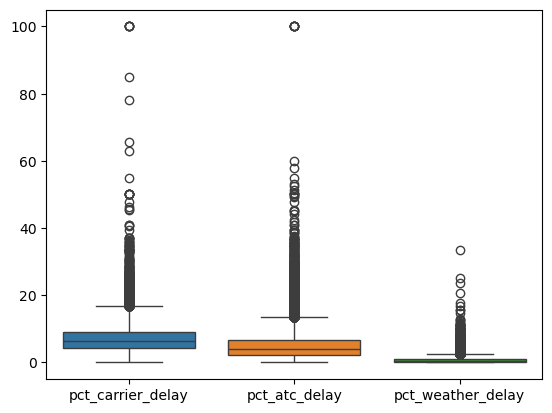

In [154]:
sns.boxplot(data=df)

### Delta, United 항공사가 이상치가 많이 보임
### Alaska가 전반적으로 발생률이 낮은 편

<Axes: xlabel='airline', ylabel='pct_carrier_delay'>

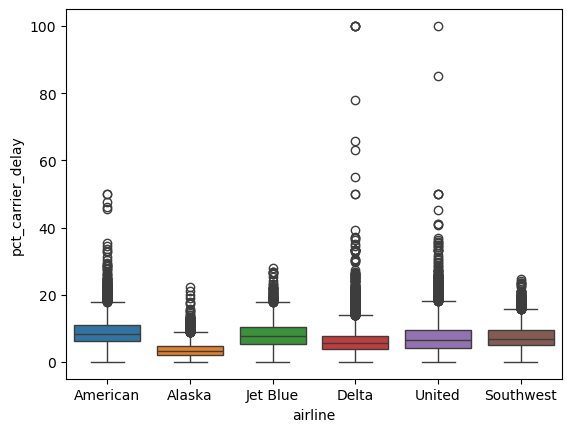

In [164]:
sns.boxplot(data=df, x='airline', y='pct_carrier_delay', hue='airline')

<Axes: xlabel='airline', ylabel='pct_atc_delay'>

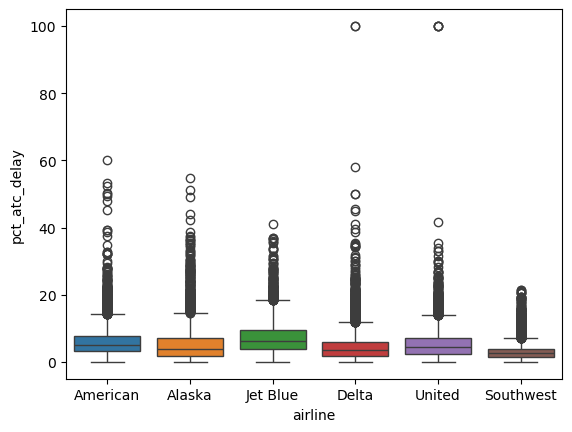

In [166]:
sns.boxplot(data=df, x='airline', y='pct_atc_delay', hue='airline')

<Axes: xlabel='airline', ylabel='pct_weather_delay'>

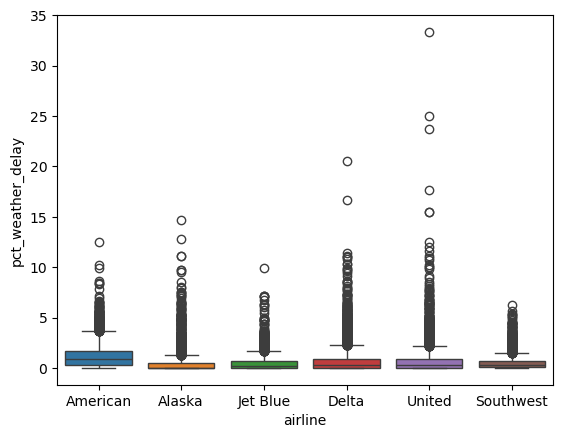

In [168]:
sns.boxplot(data=df, x='airline', y='pct_weather_delay', hue='airline')

### pairplot을 보니 세 변수가 딱히 상관이 있는 것처럼 보이지는 않음

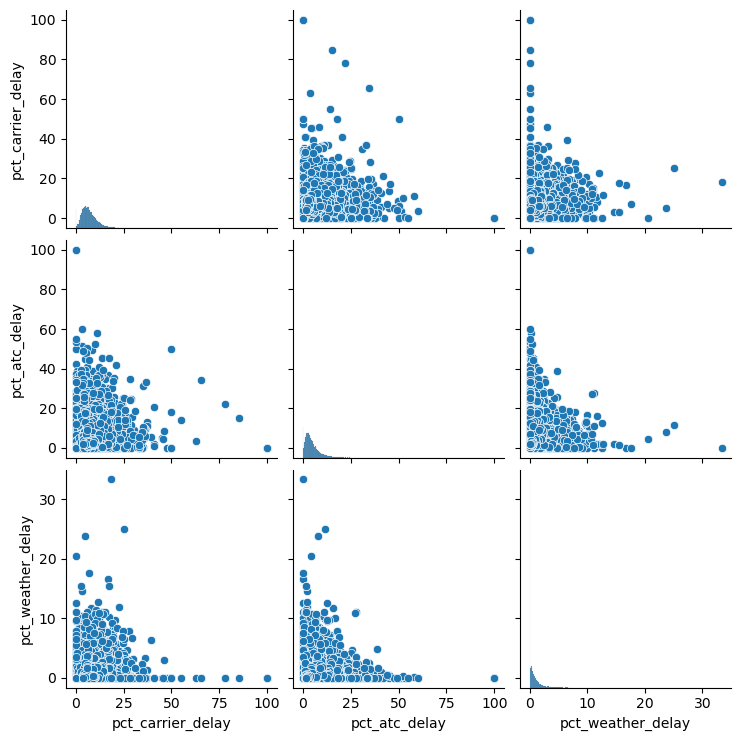

In [177]:
sns.pairplot(data=df)

In [182]:
df[['pct_weather_delay','pct_atc_delay','pct_carrier_delay']].corr()

,pct_weather_delay,pct_atc_delay,pct_carrier_delay
pct_weather_delay,1.000000,0.091729,0.161474
pct_atc_delay,0.091729,1.000000,0.144474
pct_carrier_delay,0.161474,0.144474,1.000000


In [186]:
df_corr = df.select_dtypes(include='number').corr()
df_corr

,pct_carrier_delay,pct_atc_delay,pct_weather_delay
pct_carrier_delay,1.000000,0.144474,0.161474
pct_atc_delay,0.144474,1.000000,0.091729
pct_weather_delay,0.161474,0.091729,1.000000


In [194]:
help(sns.heatmap)

Help on function heatmap in module seaborn.matrix:

heatmap(data, *, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)
    Plot rectangular data as a color-encoded matrix.

    This is an Axes-level function and will draw the heatmap into the
    currently-active Axes if none is provided to the ``ax`` argument.  Part of
    this Axes space will be taken and used to plot a colormap, unless ``cbar``
    is False or a separate Axes is provided to ``cbar_ax``.

    Parameters
    ----------
    data : rectangular dataset
        2D dataset that can be coerced into an ndarray. If a Pandas DataFrame
        is provided, the index/column information will be used to label the
        columns and rows.
    vmin, vmax : floats, optional
        Values to anchor the colormap, otherwise they are

### 항공사 요인들 간 상관관계가 약함

<Axes: >

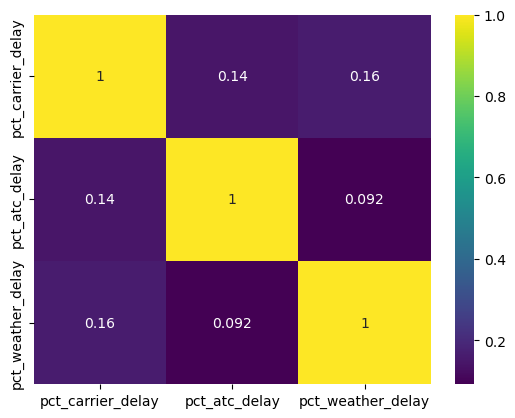

In [196]:
sns.heatmap(df_corr, annot=True, cmap='viridis')

## 결측치 제거

In [200]:
df1 = df.dropna()
df1

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American
...,...,...,...,...
33463,6.186422,8.798491,1.651940,Southwest
33464,9.522167,3.591133,0.261084,Southwest
33465,9.164179,2.664179,0.343284,Southwest
33466,5.152293,1.964520,0.122817,Southwest


### 결측치 제거후에도 상관계수에 변화는 없음

<Axes: >

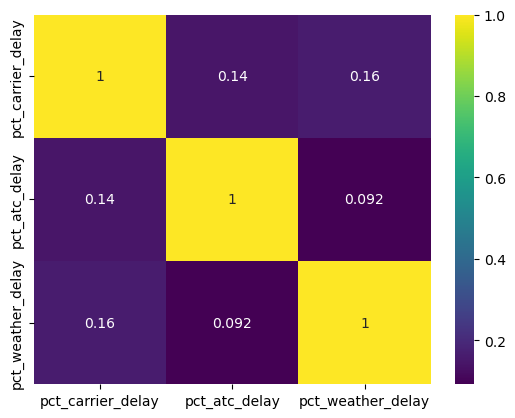

In [202]:
df_corr1 = df1.select_dtypes(include='number').corr()
sns.heatmap(df_corr1, annot=True, cmap='viridis')